In [1]:
# Step 1: Import libraries
import pandas as pd

# Step 2: Load dataset
df = pd.read_csv("heart.csv")

# Step 3: Basic checks
print("Shape of dataset:", df.shape)
print("\nFirst 5 rows:\n", df.head())
print("\nData Types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

Shape of dataset: (1025, 14)

First 5 rows:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Data Types:
 age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Missing values:
 age       

In [2]:
# Count the values of the target variable
df['target'].value_counts()

,count
target,
1,526
0,499


In [3]:
# Features and target
X = df.drop('target', axis=1)  # all columns except 'target'
y = df['target']               # target column

In [4]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create and train model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Predict on test set
log_pred = log_model.predict(X_test)

# Evaluate
print("🔍 Logistic Regression Accuracy:", accuracy_score(y_test, log_pred))
print("\nClassification Report:\n", classification_report(y_test, log_pred))

🔍 Logistic Regression Accuracy: 0.7951219512195122

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Create and train model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
knn_pred = knn_model.predict(X_test)

# Evaluate
print("🔍 KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("\nClassification Report:\n", classification_report(y_test, knn_pred))

🔍 KNN Accuracy: 0.7317073170731707

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.73      0.73       102
           1       0.73      0.74      0.73       103

    accuracy                           0.73       205
   macro avg       0.73      0.73      0.73       205
weighted avg       0.73      0.73      0.73       205



In [7]:
from sklearn.tree import DecisionTreeClassifier

# Create and train model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predict on test set
dt_pred = dt_model.predict(X_test)

# Evaluate
print("🔍 Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))
print("\nClassification Report:\n", classification_report(y_test, dt_pred))

🔍 Decision Tree Accuracy: 0.9853658536585366

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



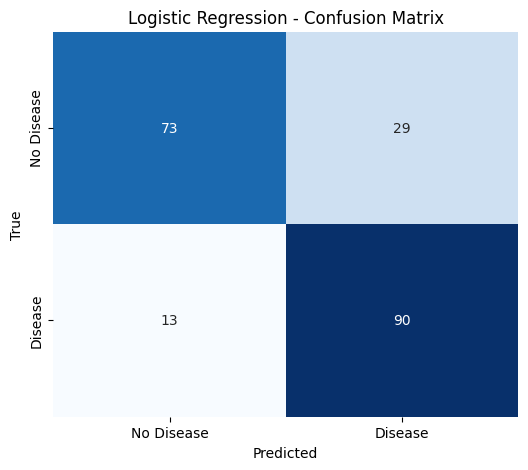

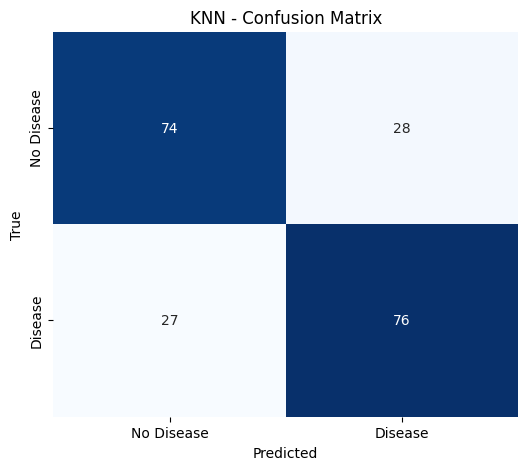

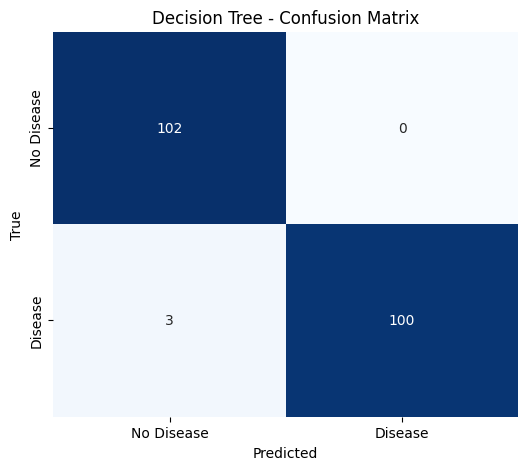

In [9]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False,
                xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, log_pred, 'Logistic Regression')
plot_confusion_matrix(y_test, knn_pred, 'KNN')
plot_confusion_matrix(y_test, dt_pred, 'Decision Tree')

<ipython-input-10-dec8dc60c4b7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='Blues_d')


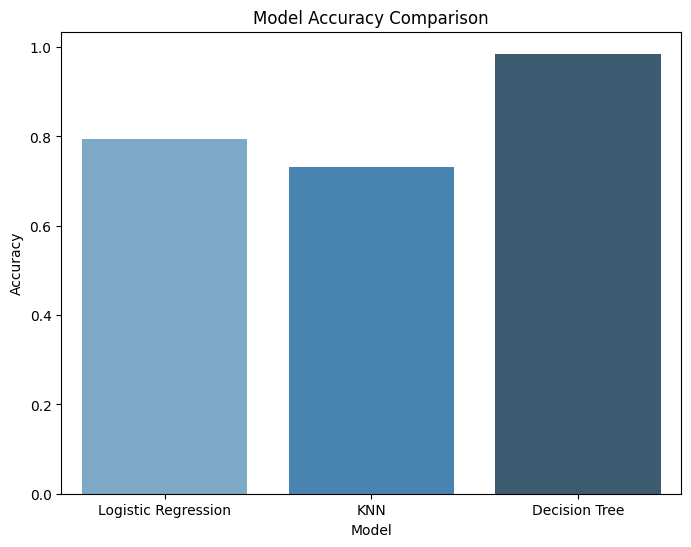

In [10]:
# Model Comparison Bar Chart
models = ['Logistic Regression', 'KNN', 'Decision Tree']
accuracies = [accuracy_score(y_test, log_pred), accuracy_score(y_test, knn_pred), accuracy_score(y_test, dt_pred)]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies, palette='Blues_d')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

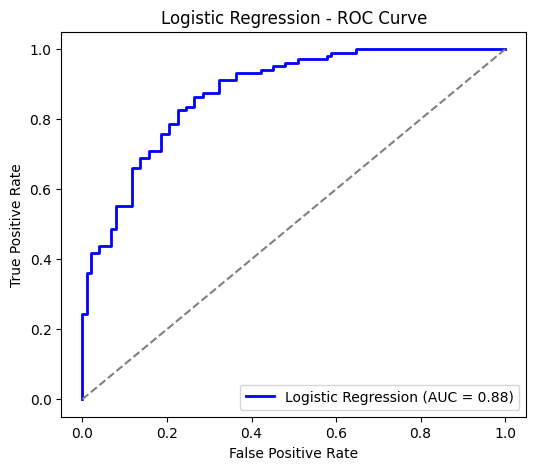

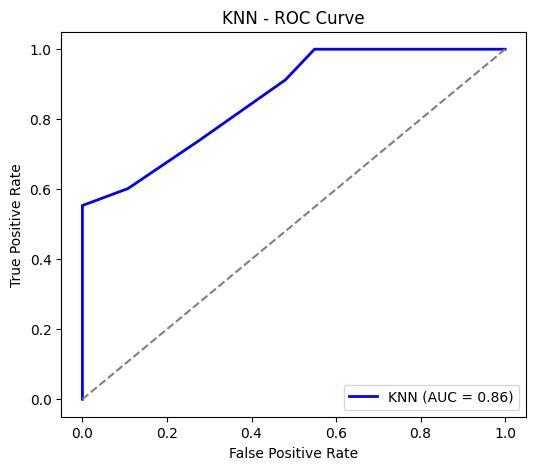

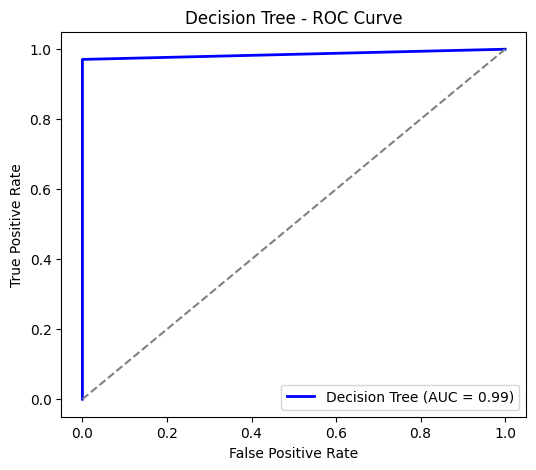

In [12]:
# Import the necessary functions
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_test, y_pred, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

# Plot ROC curves for each model
plot_roc_curve(y_test, log_model.predict_proba(X_test)[:,1], 'Logistic Regression')
plot_roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], 'KNN')
plot_roc_curve(y_test, dt_model.predict_proba(X_test)[:,1], 'Decision Tree')

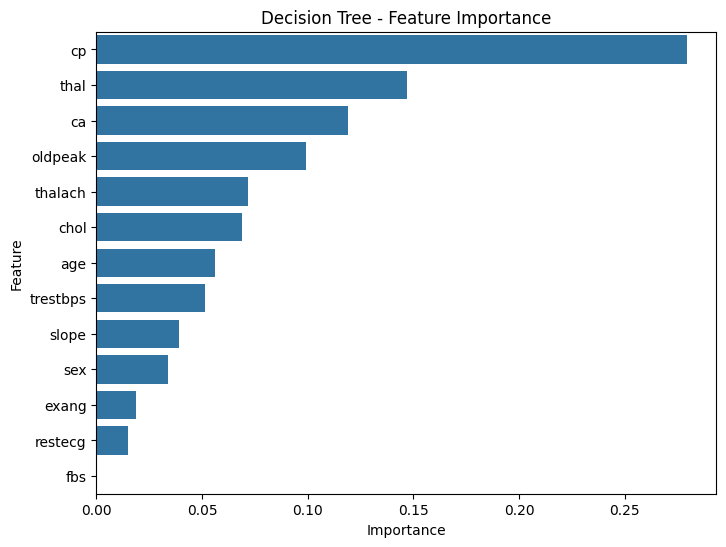

In [13]:
# Plot Feature Importance for Decision Tree
feature_importance = dt_model.feature_importances_
features = X.columns

# Create a dataframe for visualization
feature_df = pd.DataFrame({'Feature': features, 'Importance': feature_importance})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title('Decision Tree - Feature Importance')
plt.show()

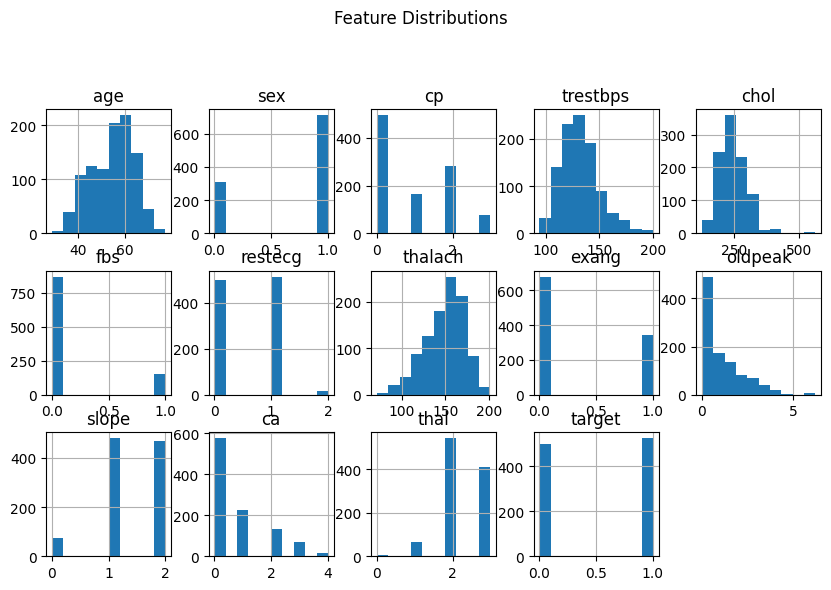

In [14]:
df.hist(bins=10, figsize=(10, 10), layout=(5, 5))
plt.suptitle('Feature Distributions')
plt.show()

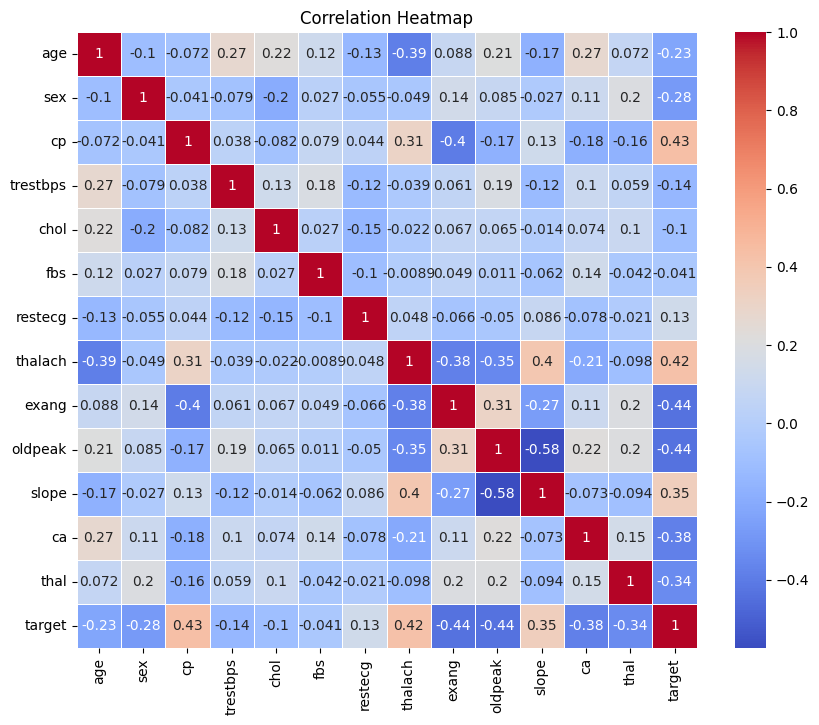

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()